In [2]:
import cdflib

In [3]:
path = './data/fitacf/hok/2017/sd_fitacf_l2_hok_20170101_v01.cdf'
cdf_file = cdflib.CDF(path)

In [4]:
data = cdflib.cdf_to_xarray(path)

In [5]:
data

<xarray.Dataset>
Dimensions:           (dim0: 3, dim1: 4, dim2: 111, dim3: 17, dim4: 2,
                       Epoch_1: 22125, rgate_no_1: 110)
Coordinates:
  * rgate_no_1        (rgate_no_1) int16 0 1 2 3 4 5 ... 104 105 106 107 108 109
  * Epoch_1           (Epoch_1) float64 6.365e+13 6.365e+13 ... 6.365e+13
Dimensions without coordinates: dim0, dim1, dim2, dim3, dim4
Data variables: (12/41)
    hdw_station_id    int16 40
    hdw_year          int16 2999
    hdw_yr_sec        int32 31556736
    hdw_lat           float32 43.53
    hdw_lon           float32 143.6
    hdw_altitude      float32 480.0
    ...                ...
    smsep_1           (Epoch_1) int16 300 300 300 300 300 ... 300 300 300 300
    nrang_max_1       (Epoch_1) int16 110 110 110 110 110 ... 110 110 110 110
    tfreq_1           (Epoch_1) float32 1.108e+04 1.108e+04 ... 1.106e+04
    noise_1           (Epoch_1) float32 6.0 8.0 7.0 4.0 6.0 ... 7.0 10.0 9.0 6.0
    num_ave_1         (Epoch_1) int16 26 26 26 26 26 26 26 ... 26 26 26 26 26 26
    txpl_1            (Epoch_1) float32 300.0 300.0 300.0 ... 300.0 300.0 300.0
Attributes: (12/35)
    Project:                     SD>Super Dual Auroral Radar Network
    Discipline:                  Space Physics>Magnetospheric Science
    Source_name:                 SD>Super Dual Auroral Radar Network
    Data_type:                   fitacf_l2>Fitacf level 2 data
    Descriptor:                  HOK>SuperDARN Hokkaido HF radar
    Data_version:                1
    ...                          ...
    rposlib_version:             librpos 1.04
    calibration_history:         10/2009: Initial quality check passed, 5/201...
    Known_problems:               
    radar_position:              +43.53N +143.61E (geographic coordinates)
    operation_start:             2006-11-10
    operation_end:

In [6]:
vars=[]
std_names=[]
dims=[]
for var in list(data.data_vars):
    vars.append(var)
    std_names.append(data.data_vars[var].attrs['standard_name'])
    dims.append(data[var].dims)
import pandas as pd
df = pd.DataFrame({'var':vars,'std_names':std_names,'dims':dims})
df.to_csv('vars.csv',index=False)

In [7]:
coods=[]
std_names_cood=[]
for coord in list(data.coords):
    coods.append(coord)
    std_names_cood.append(data[coord].attrs['standard_name'])
df_cood=pd.DataFrame({'cood':coods,'std_name':std_names_cood})
df_cood.to_csv('coods.csv', index=False)

In [8]:
data['vlos_1'][:,:,0].shape

(22125, 110)

In [9]:
data.coords

Coordinates:
  * rgate_no_1  (rgate_no_1) int16 0 1 2 3 4 5 6 ... 103 104 105 106 107 108 109
  * Epoch_1     (Epoch_1) float64 6.365e+13 6.365e+13 ... 6.365e+13 6.365e+13

In [10]:
data['dim0']

<xarray.DataArray 'dim0' (dim0: 3)>
array([0, 1, 2])
Dimensions without coordinates: dim0

In [11]:
import datetime
epochs = [datetime.datetime.utcfromtimestamp(t) for t in cdflib.cdfepoch.unixtime(data['Epoch_1'].values)]

In [12]:
print(epochs[0])

2017-01-01 00:01:00


In [13]:
# start=datetime.datetime.strptime(data.attrs['Data_start_time'],"%Y-%m-%d/%H:%M:%S")
# epochs=[start+datetime.timedelta(seconds=i*3) for i in range(len(data['Epoch_1']))]

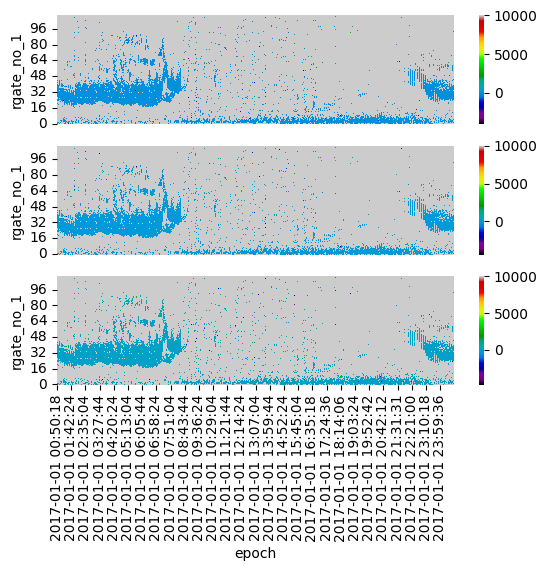

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3)
sns.heatmap(data['vlos_1'][:,:,0].T, ax=ax[0],cmap='nipy_spectral')
sns.heatmap(data['vlos_1'][:,:,1].T, ax=ax[1],cmap='nipy_spectral')
sns.heatmap(data['vlos_1'][:,:,2].T, ax=ax[2],cmap='nipy_spectral')
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()
ax[0].set(xticklabels=[],ylabel='rgate_no_1')
ax[1].set(xticklabels=[],ylabel='rgate_no_1')
ax[0].tick_params(bottom=False)
ax[1].tick_params(bottom=False)
ax[2].set_xticklabels(epochs[::len(epochs)//len(ax[2].get_xticklabels())][1:])
ax[2].set(xlabel='epoch',ylabel='rgate_no_1')
plt.show()